```
---
title: Intro Classification + KNN
duration: "1:5"
creator:
    name: Kiefer Katovich + David Yerrington
    city: SF
---
```

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Intro to Classification + KNN
Week 5 | Lesson 1.1


![](https://snag.gy/RKWYcC.jpg)

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Identify classification problems
- Implement KNN with sklearn

---

# (5 mins) Discussion:

# 1.  Exactly what is classification and how is it different than regression?
# 2 . What sort of problems do you solve with classification?

# Identify that problem:  Classification or Regression?

![](https://snag.gy/0j5DbL.jpg)




# Identify that problem: Classification or Regression?

![](https://snag.gy/Rk6sEw.jpg)

# Identify that problem: Classification or Regression?

<br>
<center>_Predicting bathrooms on Star Trek starships based on dilithium crystal size and warp capabilities._</center>

![](https://snag.gy/9Nok4x.jpg)

# Identify that problem: Classification or Regression?
<br>

![](https://snag.gy/lS3FNa.jpg)

## Identify that Problem: Classification or Regression

![](http://i.imgur.com/B67Ojpe.gif)

## Classification Intro

![](https://snag.gy/0Jns5x.jpg)

Classifcation methods in machine learning are fundamentally supervised methods where the training data which observations are associated with a (discrete) label designating their class.  Classification is different than regression (with continious values) because we are now predicting classes / labels.  This can be thought of as a discrimination problem, modelling the differences or similarities between groups. 

*Classifcation is supervised because we know the labels of our trained / sampled observations.*





## Common Classification Problems

The realm of classifcation is vast in the machine learning world.  Working with labled data still gives us the opporuntity to measure error.

### Facial Recognition
![](http://3qeqpr26caki16dnhd19sv6by6v.wpengine.netdna-cdn.com/wp-content/uploads/2013/11/face_detection.jpg)

### Recommendation
![](https://snag.gy/zKcO31.jpg)

### Sentiment Analysis 
![](https://snag.gy/DbX2TL.jpg)

# Common Classification Methods

## K-Nearest Neighbors
![](https://snag.gy/J38wxN.jpg)

## Logistic Regression
![](https://snag.gy/NCnh3b.jpg)

## Naive Bayes
![](https://snag.gy/ZJwmn6.jpg)

## Decision Trees
![](https://snag.gy/cJL5gr.jpg)

## Classfication Evaluation

Classification is assessed much differently than continuious regression.  Generally, we are concerned with if we misidentified anything incorrectly, completely missed the mark, or predicted correctly between our traning and test sets during cross validation.  There are a few different things we usually talk about and look at when it pertains to classification related to these ideas such as **precision**, **recall**, **accuracy**, **F-measures**, **class imbalance**, and our beloved **Reciever Operator Curve**.

Once we get a sense of how our classfication method performs, we have the opporutnity to tune for sensitivity or specificity.

> **Sensitivity and specificity** are statistical measures of the performance of a binary classification test, also known in statistics as classification function:

> **Sensitivity** (also called the true positive rate, the recall, or probability of detection[1] in some fields) measures the proportion of positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).

> **Specificity** (also called the true negative rate) measures the proportion of negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).

> [Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)


#### Confusion Matrix
![](https://snag.gy/qit9l3.jpg)

**Confusion Matrix - sklearn**
![](https://snag.gy/b6VDIo.jpg)

### ROC Figures
![](https://snag.gy/CBxZbh.jpg)

### sklearn "classification_report()"
```python
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))
             precision    recall  f1-score   support

    class 0       0.67      1.00      0.80         2
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.50      0.67         2

avg / total       0.67      0.60      0.59         5
```

# K Nearest Neighbors classification walkthrough

From here on out we are going to look at how the kNN algorithm classifies malignant vs. benign tumor category in the Wisconsin breast cancer dataset.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

[NOTE: in the case of ties, sklearn's `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]

---

### 1. Import necessary packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier

In [2]:
import imp
plotter = imp.load_source('plotter', 'knn_plotter.py')
from plotter import KNNBoundaryPlotter

---

### 2. Load in the dataset

My path, for example, below: is provided.

(The file as suffix '.data' but is actually formatted as a .csv)

In [3]:
df = pd.read_csv('./datasets/breast_cancer_wisconsin/wdbc.data', 
                 header=None, index_col=None)

---

### 2.2 Renaming the columns

The attributes below will be the columns of the dataset.

      Attribute                     
   --------------------------------------------
   1. Sample code number [subject ID]
   2. Class
   3. Cell nucleus mean radius
   4. Cell nucleus SE radius
   5. Cell nucleus worst radius
   6. Texture mean
   7. Texture SE
   8. Texture worst
   9. Perimeter mean
   10. Perimeter SE
   11. Perimeter worst
   12. Area mean
   13. Area SE
   14. Area worst
   15. Smoothness mean
   16. Smoothness SE
   17. Smoothness worst
   18. Compactness mean
   19. Compactness SE
   20. Compactness worst
   21. Concavity mean
   22. Concavity SE
   23. Concavity worst
   24. Concave points mean
   25. Concave points SE
   26. Concave points worst
   27. Symmetry mean
   28. Symmetry SE
   29. Symmetry worst
   30. Fractal dimension mean
   31. Fractal dimension SE
   32. Fractal dimension worst

## Any interesting patterns about how these features are named?

In [4]:
# There is also a consolidated version of this dataset in sklearn.datasets -- a quick look at it
from sklearn.datasets import load_breast_cancer
bcd = load_breast_cancer()
print bcd['DESCR']

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

The column names are taken from the dataset info file. 

For more information check out the information file:

`../assets/datasets/wdbc.names`

You can open it with a text editor of your choice.

Create an array with the column names and assign them as the header when loading the csv.

In [5]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [6]:
!cat ./datasets/breast_cancer_wisconsin/wdbc.names

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [7]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

df.columns = column_names

---

### 2.3 Check out the dataset information

Print out the head and the datatypes.

In [8]:
# How about that target / response?

### What should we check first when we look at a new dataset?
Anything interesting?

---

### 2.4 Add our target "malignant"

In some wbc datasets, the "malignant" class target variable is coded as "B" for benign and "M" as malignant.  We will need to encode these as 0 or 1.

In [9]:
df['malignant'] = df['malignant'].map(lambda value: 1 if value == "M" else 0)

In [10]:
df.head()

id  malignant  nucleus_mean  nucleus_se  nucleus_worst  texture_mean  \
0    842302          1         17.99       10.38         122.80        1001.0   
1    842517          1         20.57       17.77         132.90        1326.0   
2  84300903          1         19.69       21.25         130.00        1203.0   
3  84348301          1         11.42       20.38          77.58         386.1   
4  84358402          1         20.29       14.34         135.10        1297.0   

   texture_se  texture_worst  perimeter_mean  perimeter_se        ...          \
0     0.11840        0.27760          0.3001       0.14710        ...           
1     0.08474        0.07864          0.0869       0.07017        ...           
2     0.10960        0.15990          0.1974       0.12790        ...           
3     0.14250        0.28390          0.2414       0.10520        ...           
4     0.10030        0.13280          0.1980       0.10430        ...           

   concavity_worst  concave_pts_mean  concave_pts_se  concave_pts_worst  \
0            25.38             17.33          184.60             2019.0   
1            24.99             23.41          158.80             1956.0   
2            23.57             25.53          152.50             1709.0   
3            14.91             26.50           98.87              567.7   
4            22.54             16.67          152.20             1575.0   

   symmetry_mean  symmetry_se  symmetry_worst  fractal_dim_mean  \
0         0.1622       0.6656          0.7119            0.2654   
1         0.1238       0.1866          0.2416            0.1860   
2         0.1444       0.4245          0.4504            0.2430   
3         0.2098       0.8663          0.6869            0.2575   
4         0.1374       0.2050          0.4000            0.1625   

   fractal_dim_se  fractal_dim_worst  
0          0.4601            0.11890  
1          0.2750            0.08902  
2          0.3613            0.08758  
3          0.6638            0.17300  
4          0.2364            0.07678  

[5 rows x 32 columns]

In [11]:
df['malignant'].value_counts()

0    357
1    212
Name: malignant, dtype: int64

In [12]:
print df.malignant.dtype

int64


---

### 3. Break up the data and look at correlations

Split up the data into 3 datasets for the "mean", "standard error", and "worst" statistics on each predictor variable.

> Because this is a large dataset with 3 major subgroups of features within it.

NOTE: The difference between standard error and standard deviation is subtle:

**Standard deviation:**
An estimate of distance between sample observations and the sample mean.

** Standard error:**
An estimate of distance between the sample mean and the real population mean.

> _Usually, a larger standard deviation will result in a larger standard error of the mean and a less precise estimate. A larger sample size will result in a smaller standard error of the mean and a more precise estimate._


In [13]:
# A function that subsets the data to the columns indicating the
# mean, se, or wrong variable types
def df_subsetter(df, suffix):
    column_select =  [col for col in df.columns if suffix in col] # filter columns by suffit
    bcw_subset    =  df[['malignant'] + column_select]            # Select only filtered columns
    bcw_subset.columns = [
        x.replace(suffix, '') for x in bcw_subset.columns         # Remove suffix from new columns
    ]
                                    
    return bcw_subset

bcw_mean  =  df_subsetter(df, '_mean')
bcw_se    =  df_subsetter(df, '_se')
bcw_worst =  df_subsetter(df, '_worst')


In [14]:
# Let's check out our subsets

bcw_mean.head()
# bcw_se.head()
# bcw_worst.head()

malignant  nucleus  texture  perimeter     area  smoothness  compactness  \
0          1    17.99   1001.0     0.3001  0.07871       8.589      0.04904   
1          1    20.57   1326.0     0.0869  0.05667       3.398      0.01308   
2          1    19.69   1203.0     0.1974  0.05999       4.585      0.04006   
3          1    11.42    386.1     0.2414  0.09744       3.445      0.07458   
4          1    20.29   1297.0     0.1980  0.05883       5.438      0.02461   

   concavity  concave_pts  symmetry  fractal_dim  
0    0.03003        17.33    0.1622       0.2654  
1    0.01389        23.41    0.1238       0.1860  
2    0.02250        25.53    0.1444       0.2430  
3    0.05963        26.50    0.2098       0.2575  
4    0.01756        16.67    0.1374       0.1625

---

### 3.1 Examine correlation matrices for the 3 datasets

Look at the correlations between variables for each of the subset datasets, excluding the id column.

Use a seaborn heatmap to make this easier on the eye.

1. The mean columns subset
2. The standard error columns subset
3. The "worst value" columns subset

> This is a different dataset than we went through in class but it is nonetheless helpful to use these techniques to see correlation to also inform variable selection.  The best way to evaluate variable selection in KNN is to look at scatter plots in many different dimesions to see how class seperation looks between different dimensions.  


> Just because a problem is multidimensional doesn't mean KNN can't work.  Remember, it's possible to measure distances between observations in multiple dimensions beyond what we can visually see (ie: more than 3 dimensions).

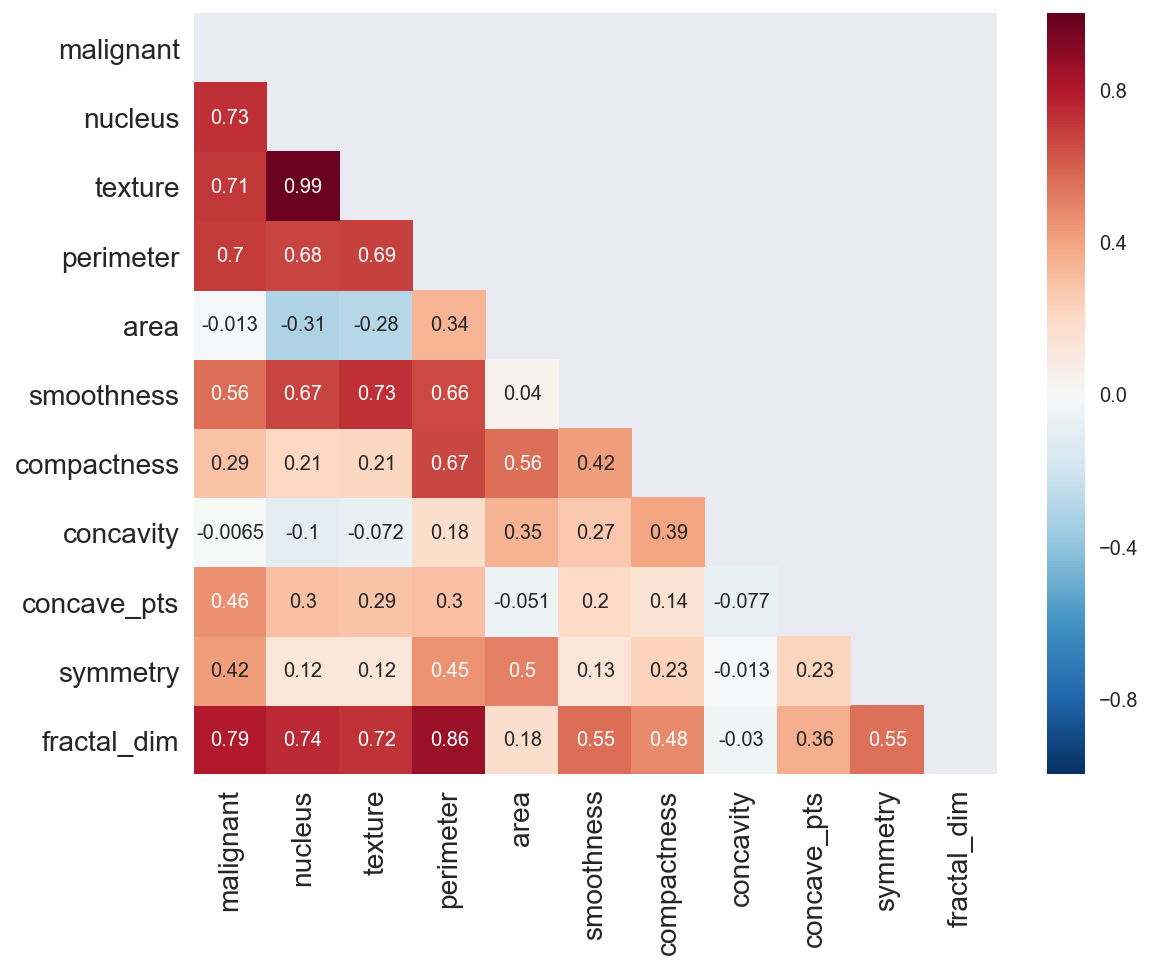

In [15]:
mean_corr = bcw_mean[[x for x in bcw_mean.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

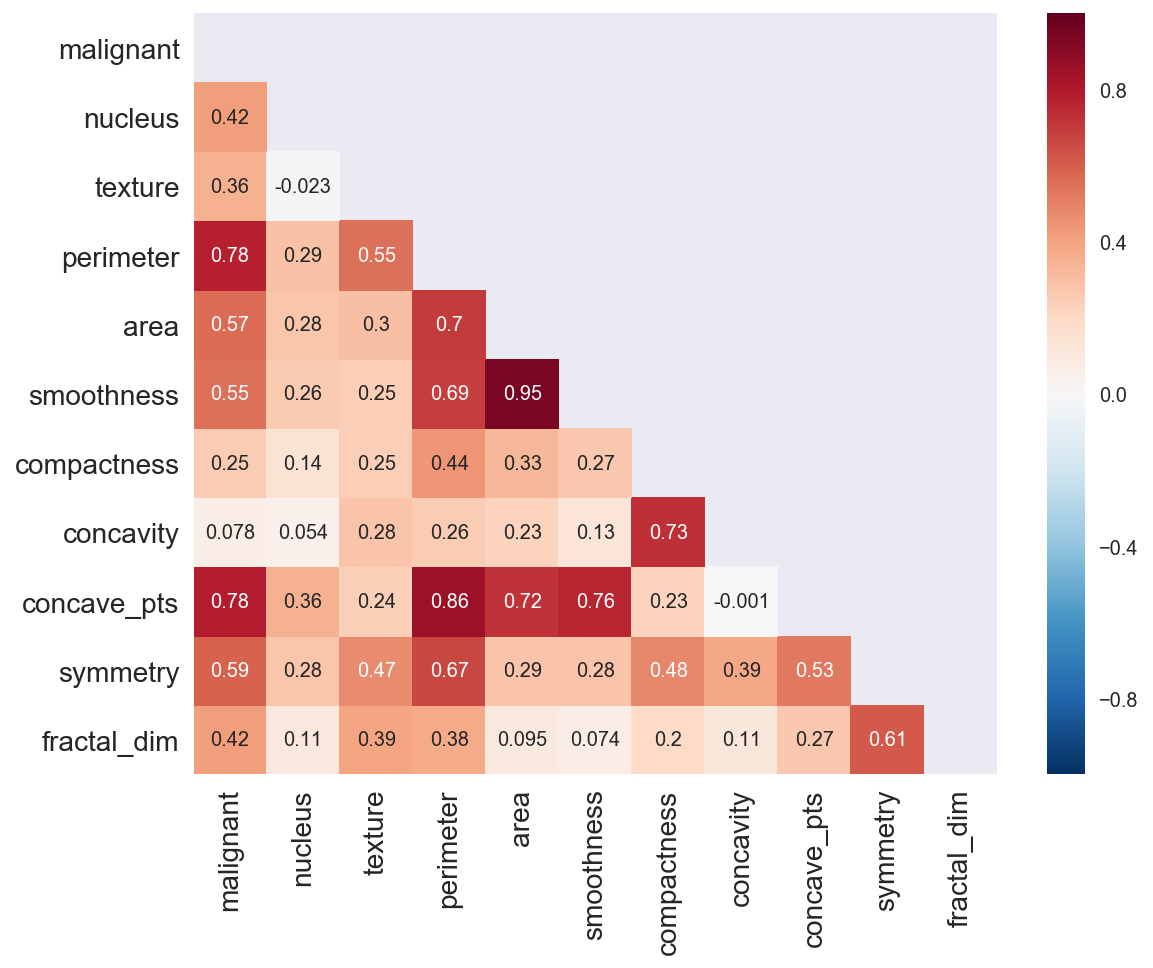

In [16]:
se_corr = bcw_se[[x for x in bcw_se.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(se_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(se_corr, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

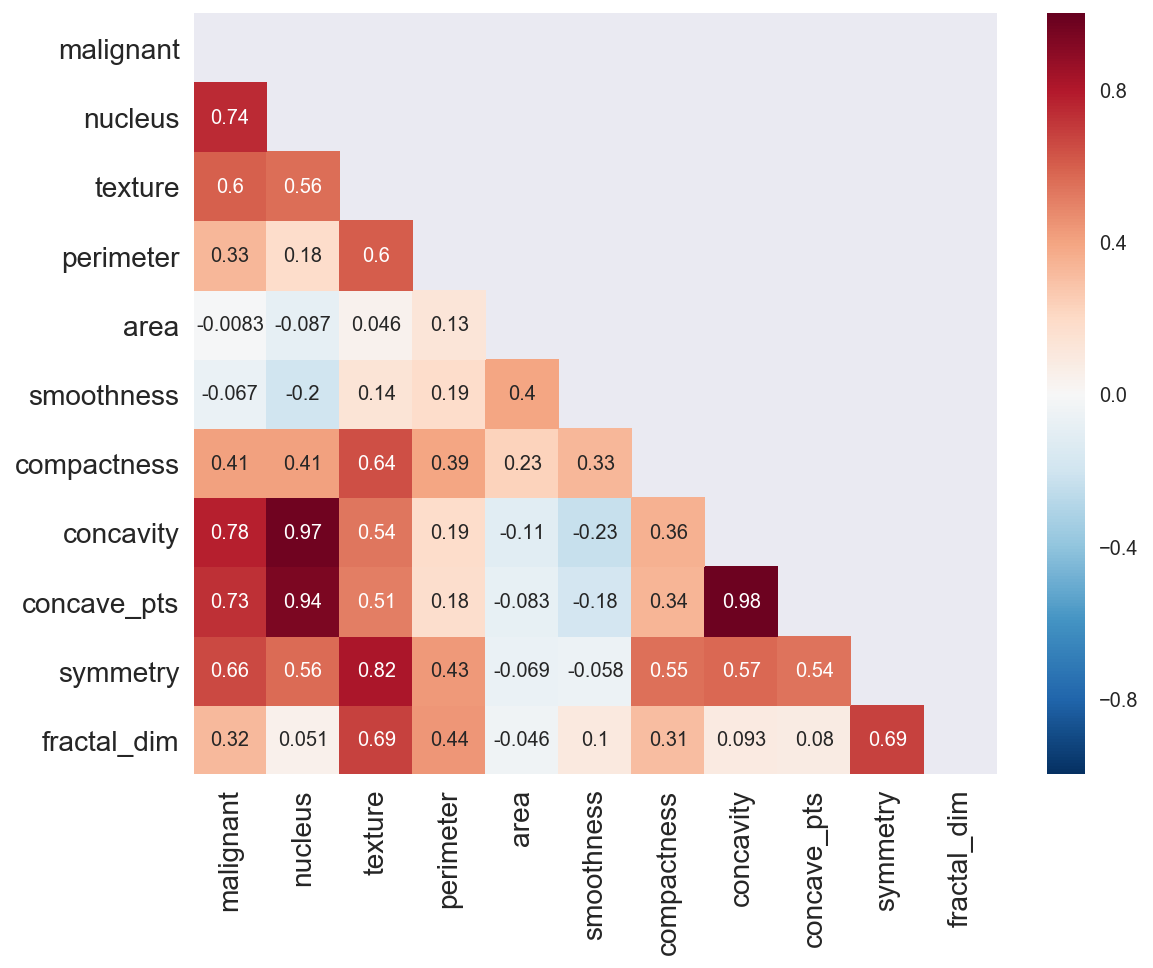

In [17]:
worst_corr = bcw_worst[[x for x in bcw_worst.columns if x not in 'id']].corr()

# Set the default matplotlib figure size:
plt.rcParams['figure.figsize']=(9,7)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(worst_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(worst_corr, mask=mask, annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

---

### 3.2 Look at correlations between mean, standard error, and worst within variable

Look at the correlations between each single variables mean, se, and worst value:

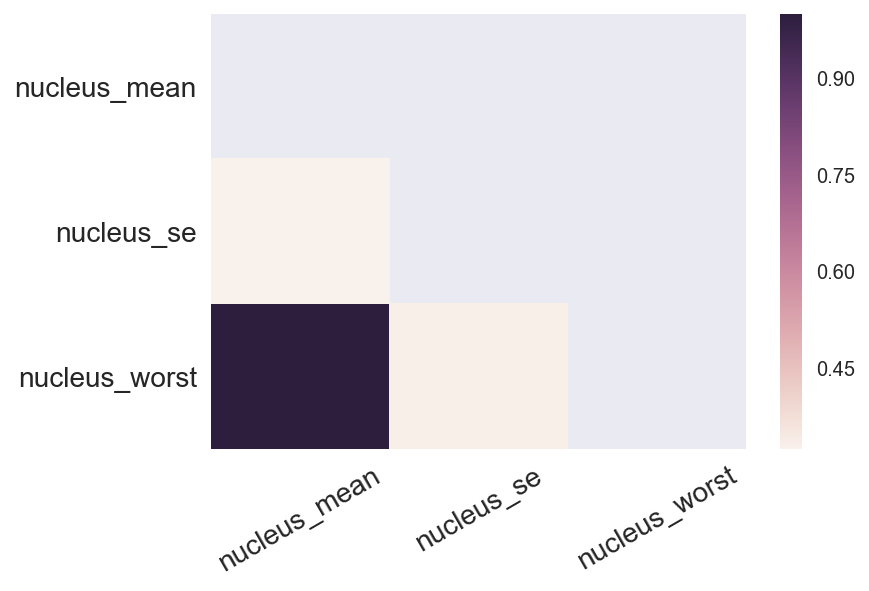

--------------------------------------------



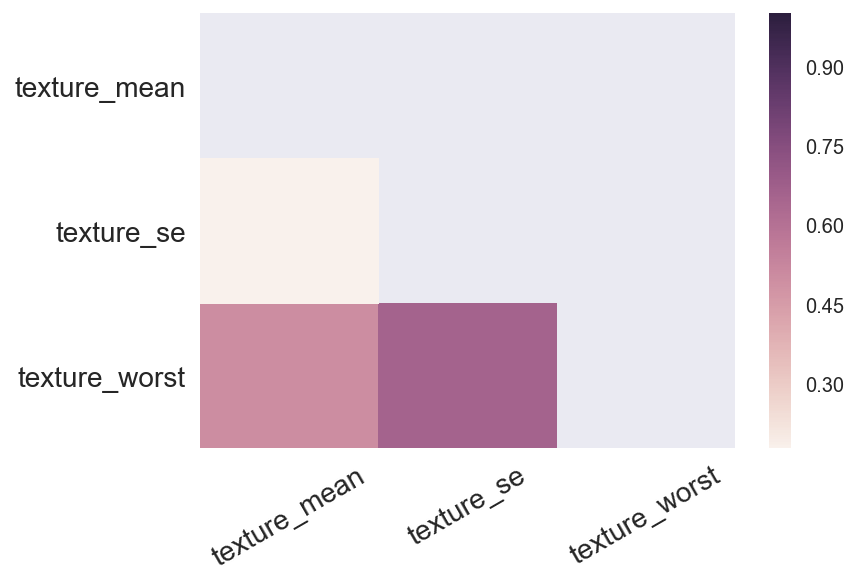

--------------------------------------------



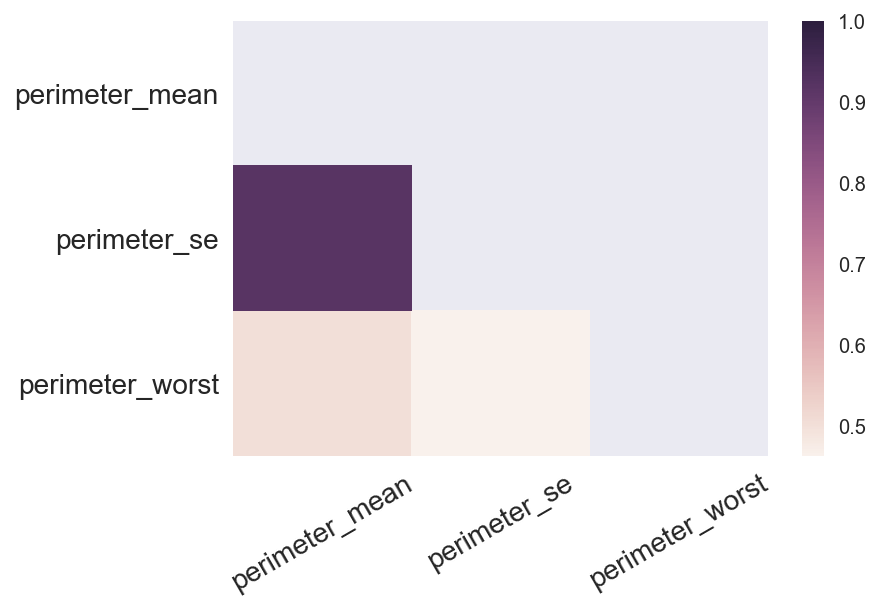

--------------------------------------------



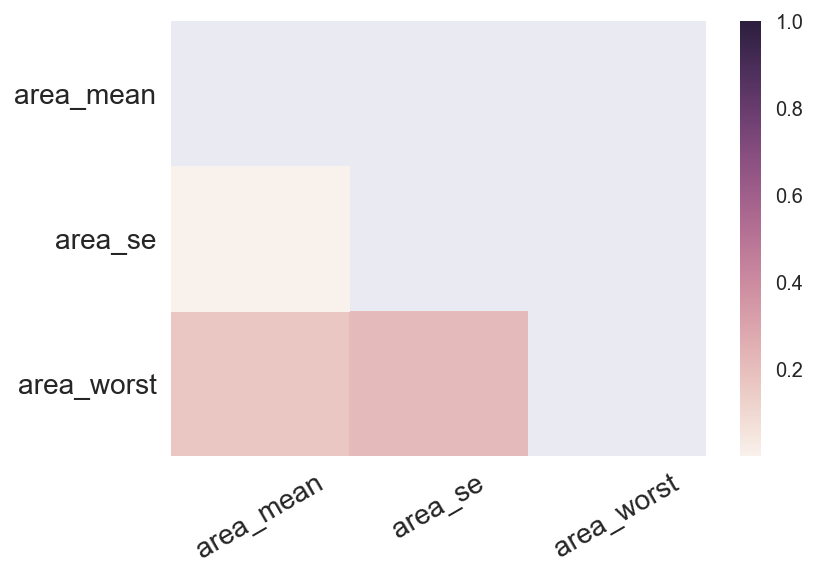

--------------------------------------------



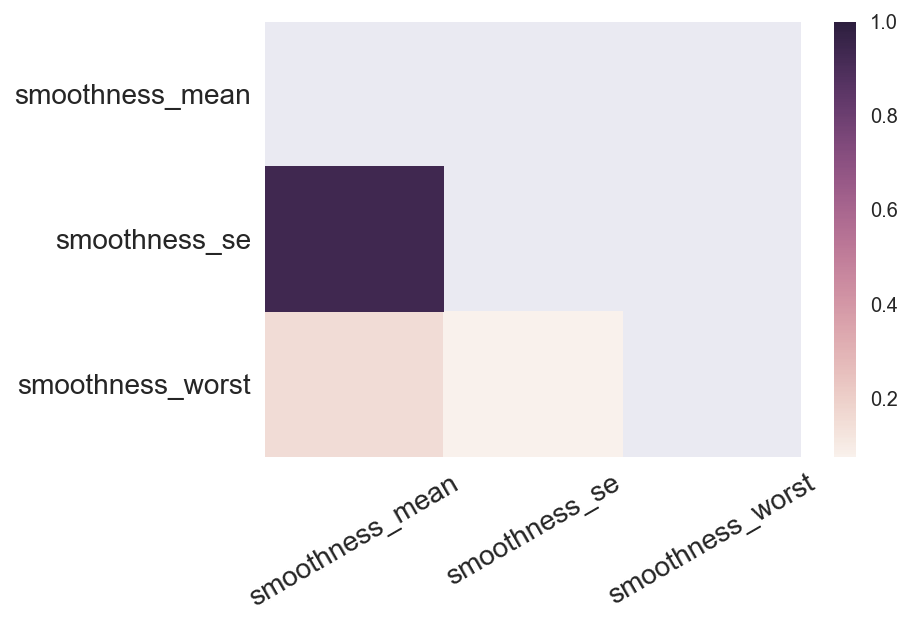

--------------------------------------------



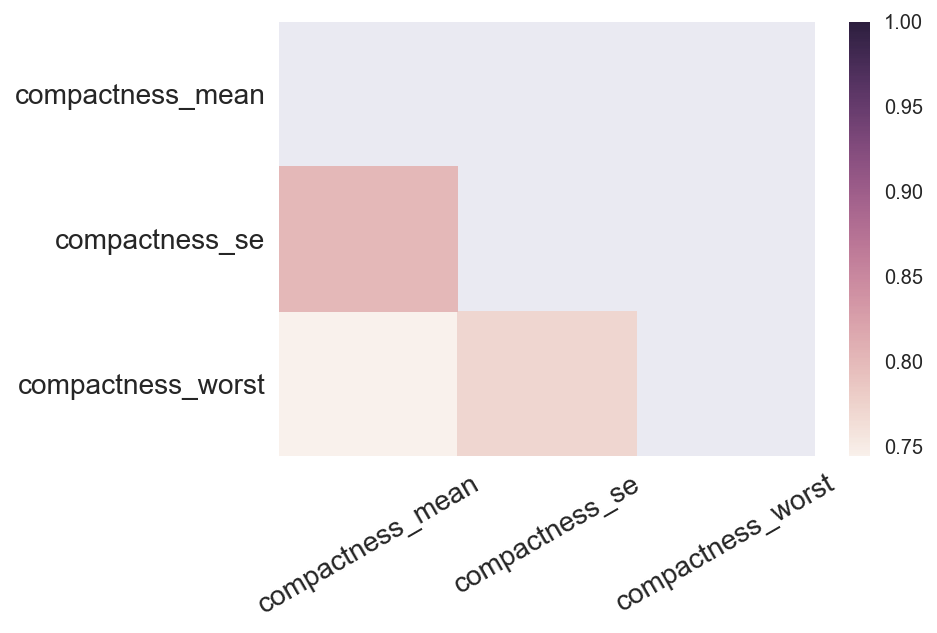

--------------------------------------------



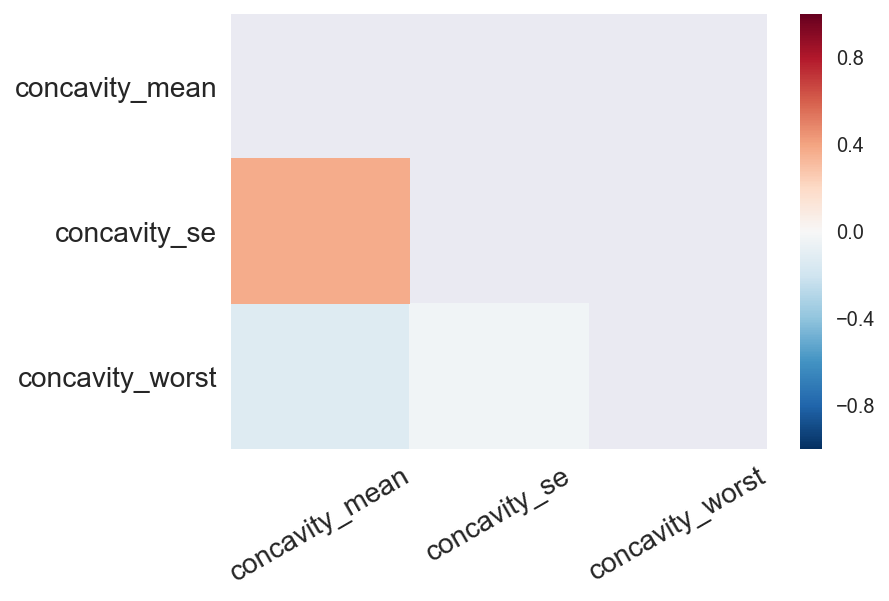

--------------------------------------------



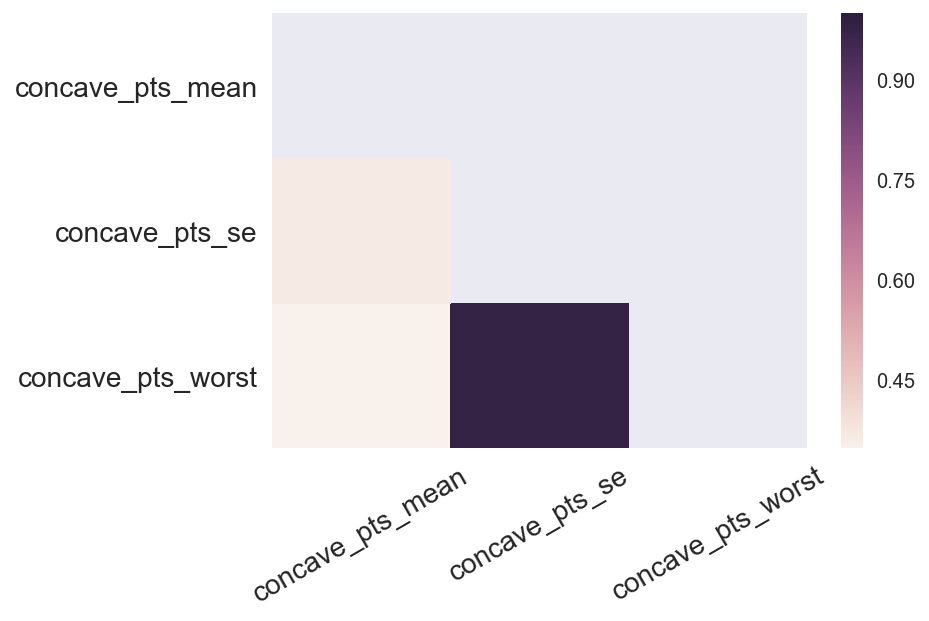

--------------------------------------------



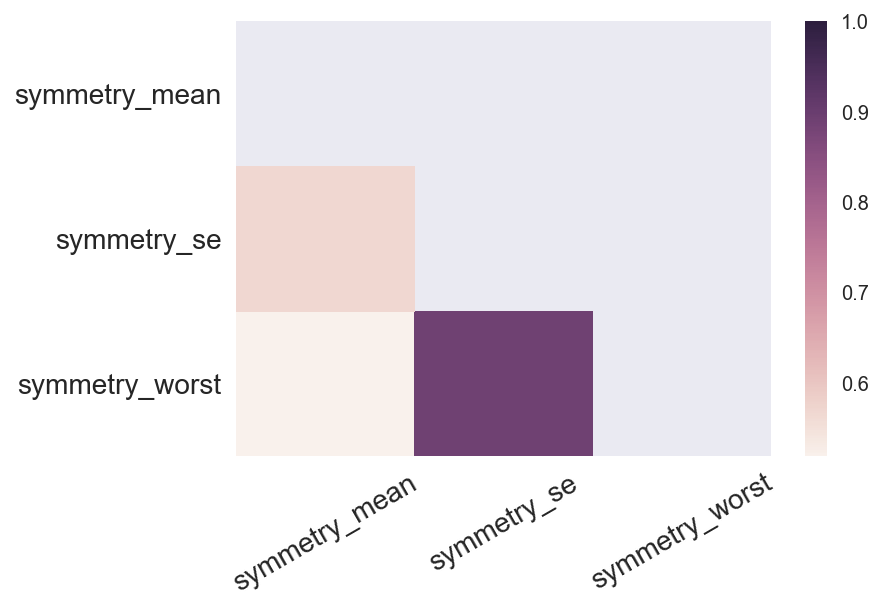

--------------------------------------------



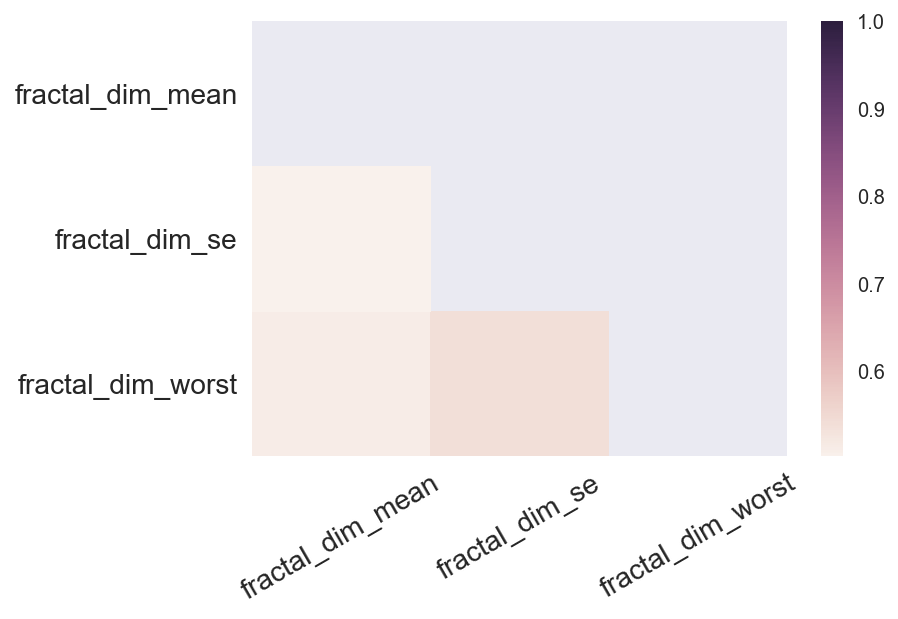

--------------------------------------------



In [18]:
# A function that prints the variable name, subsets the data to just
# be columns that have those variable names, and print out the
# correlation between the variables
def variable_corr_heatmapper(df, varname):
    var_corr = df[[x for x in df.columns if varname in x]].corr()
    
    plt.rcParams['figure.figsize']=(6,4)
    
    mask = np.zeros_like(var_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    ax = sns.heatmap(var_corr, mask=mask)
    
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)
    plt.show()
    print '--------------------------------------------\n'

# get the variable names without the _mean, _se, _worst suffixes and
# remove duplicate names by filtering
varnames = [
    x.replace('_mean','')
    for x in df.columns
    if x not in ['id','malignant']
    and '_se' not in x
    and '_worst' not in x
]
# df.columns
# varnames
for var in varnames:
    variable_corr_heatmapper(df, var)

---

### 4. Use seaborn's pairplot to visualize relationships between variables

Look at the data using seaborn's `pairplot()` function. The hue will be the class variable "malignant". The variables will be the other columns excluding, of course, the subject ID column.

Most of these predictors are highly correlated with the "class" variable. This is already an indication that our classifier is very likely to perform well.

In [19]:
# set the seaborn style to have a white background
sns.set(style="ticks", color_codes=True)

# This function does a pairplot across your variables with the color
# set as the outcome "malignant" class variable
def bcw_pairplotter(df, variables, sample_frac=0.3):
    # sample_frac lets you specify an amount of the data to sample for the plot.
    # this speeds up the function which can take awhile with the full data.
    
    # get the number of rows/data points:
    rows = df.shape[0]
    
    # get downsample indicies for the data, if specified
    if sample_frac < 1.0:
        sample_inds = np.random.choice(range(0,rows), 
                                       size=int(round(rows*sample_frac)), 
                                       replace=False).astype(int)
    
    # make the pairplot for the variables:
    pairs = sns.pairplot(df.iloc[sample_inds, :], 
                         vars=variables, 
                         hue="malignant", 
                         palette=sns.xkcd_palette(['windows blue', 'amber']))


# get out the column variable names to put into the pairplotter function
colvars = [x for x in bcw_mean if x not in ['id','malignant']]

---

### 4.2 Plot the mean data subset with the pairplotter function

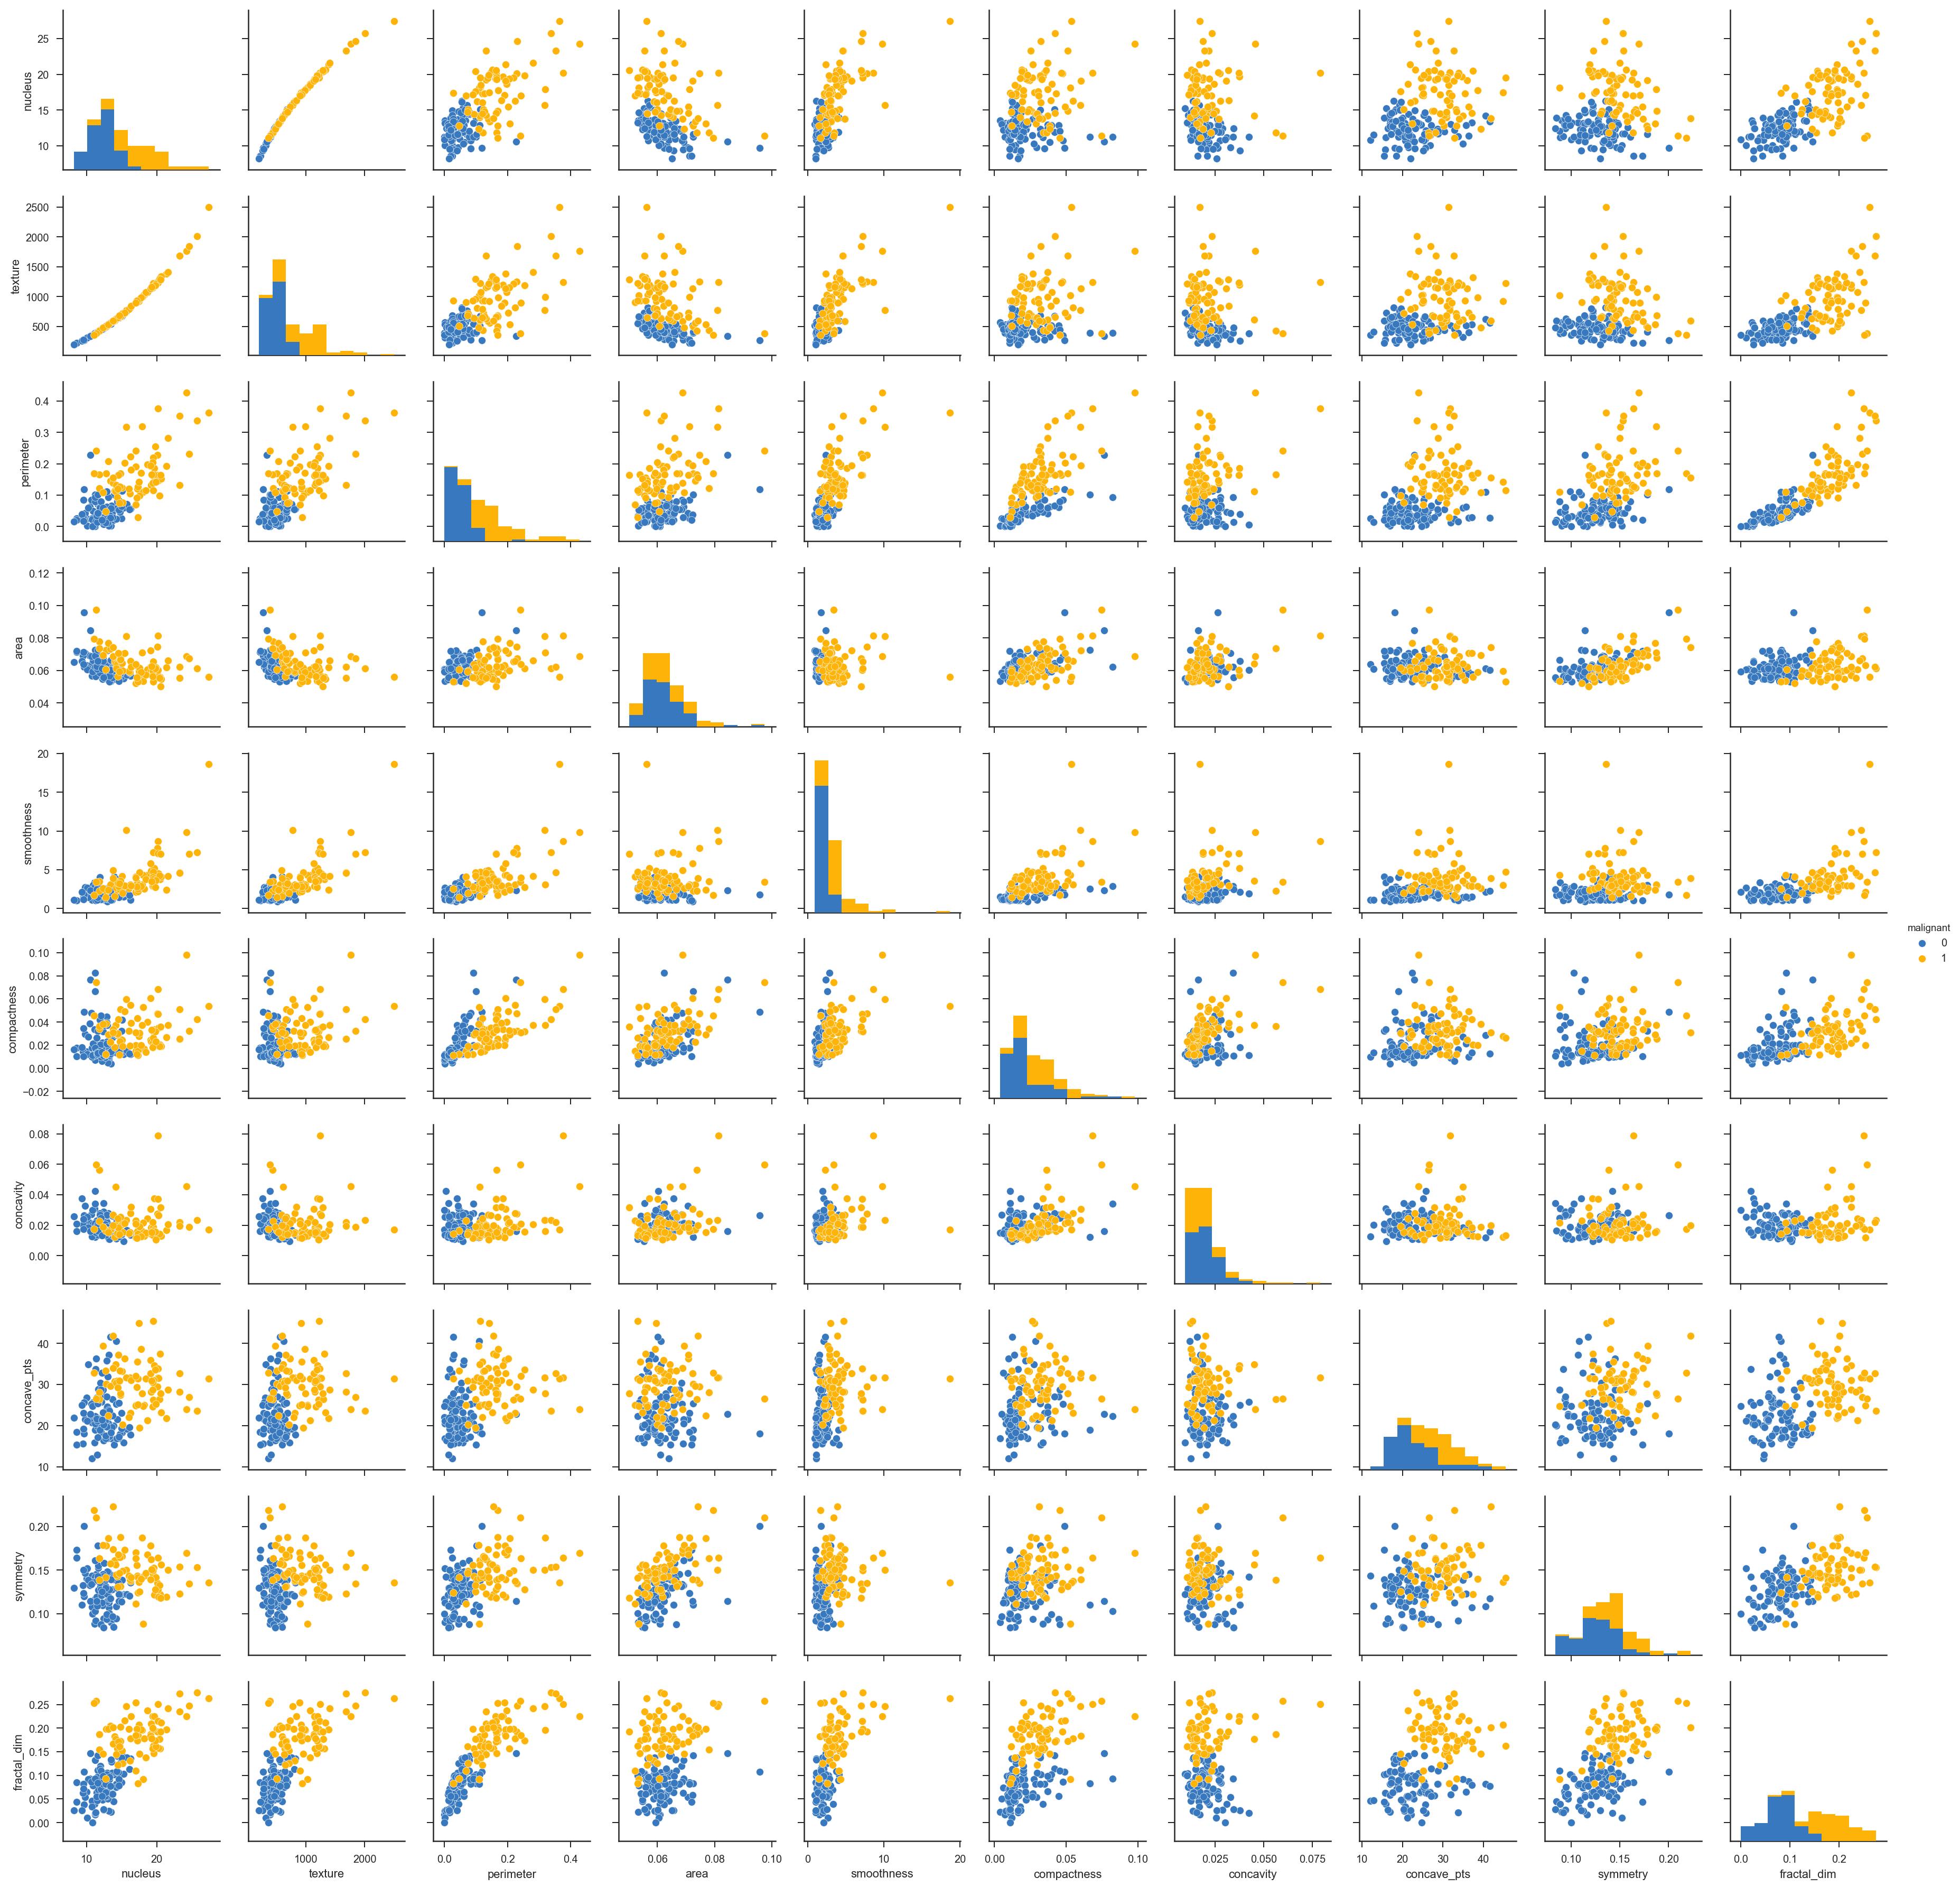

In [20]:
bcw_pairplotter(bcw_mean, colvars)

---

### 4.3 Plot the standard error data subset with the pairplotter function

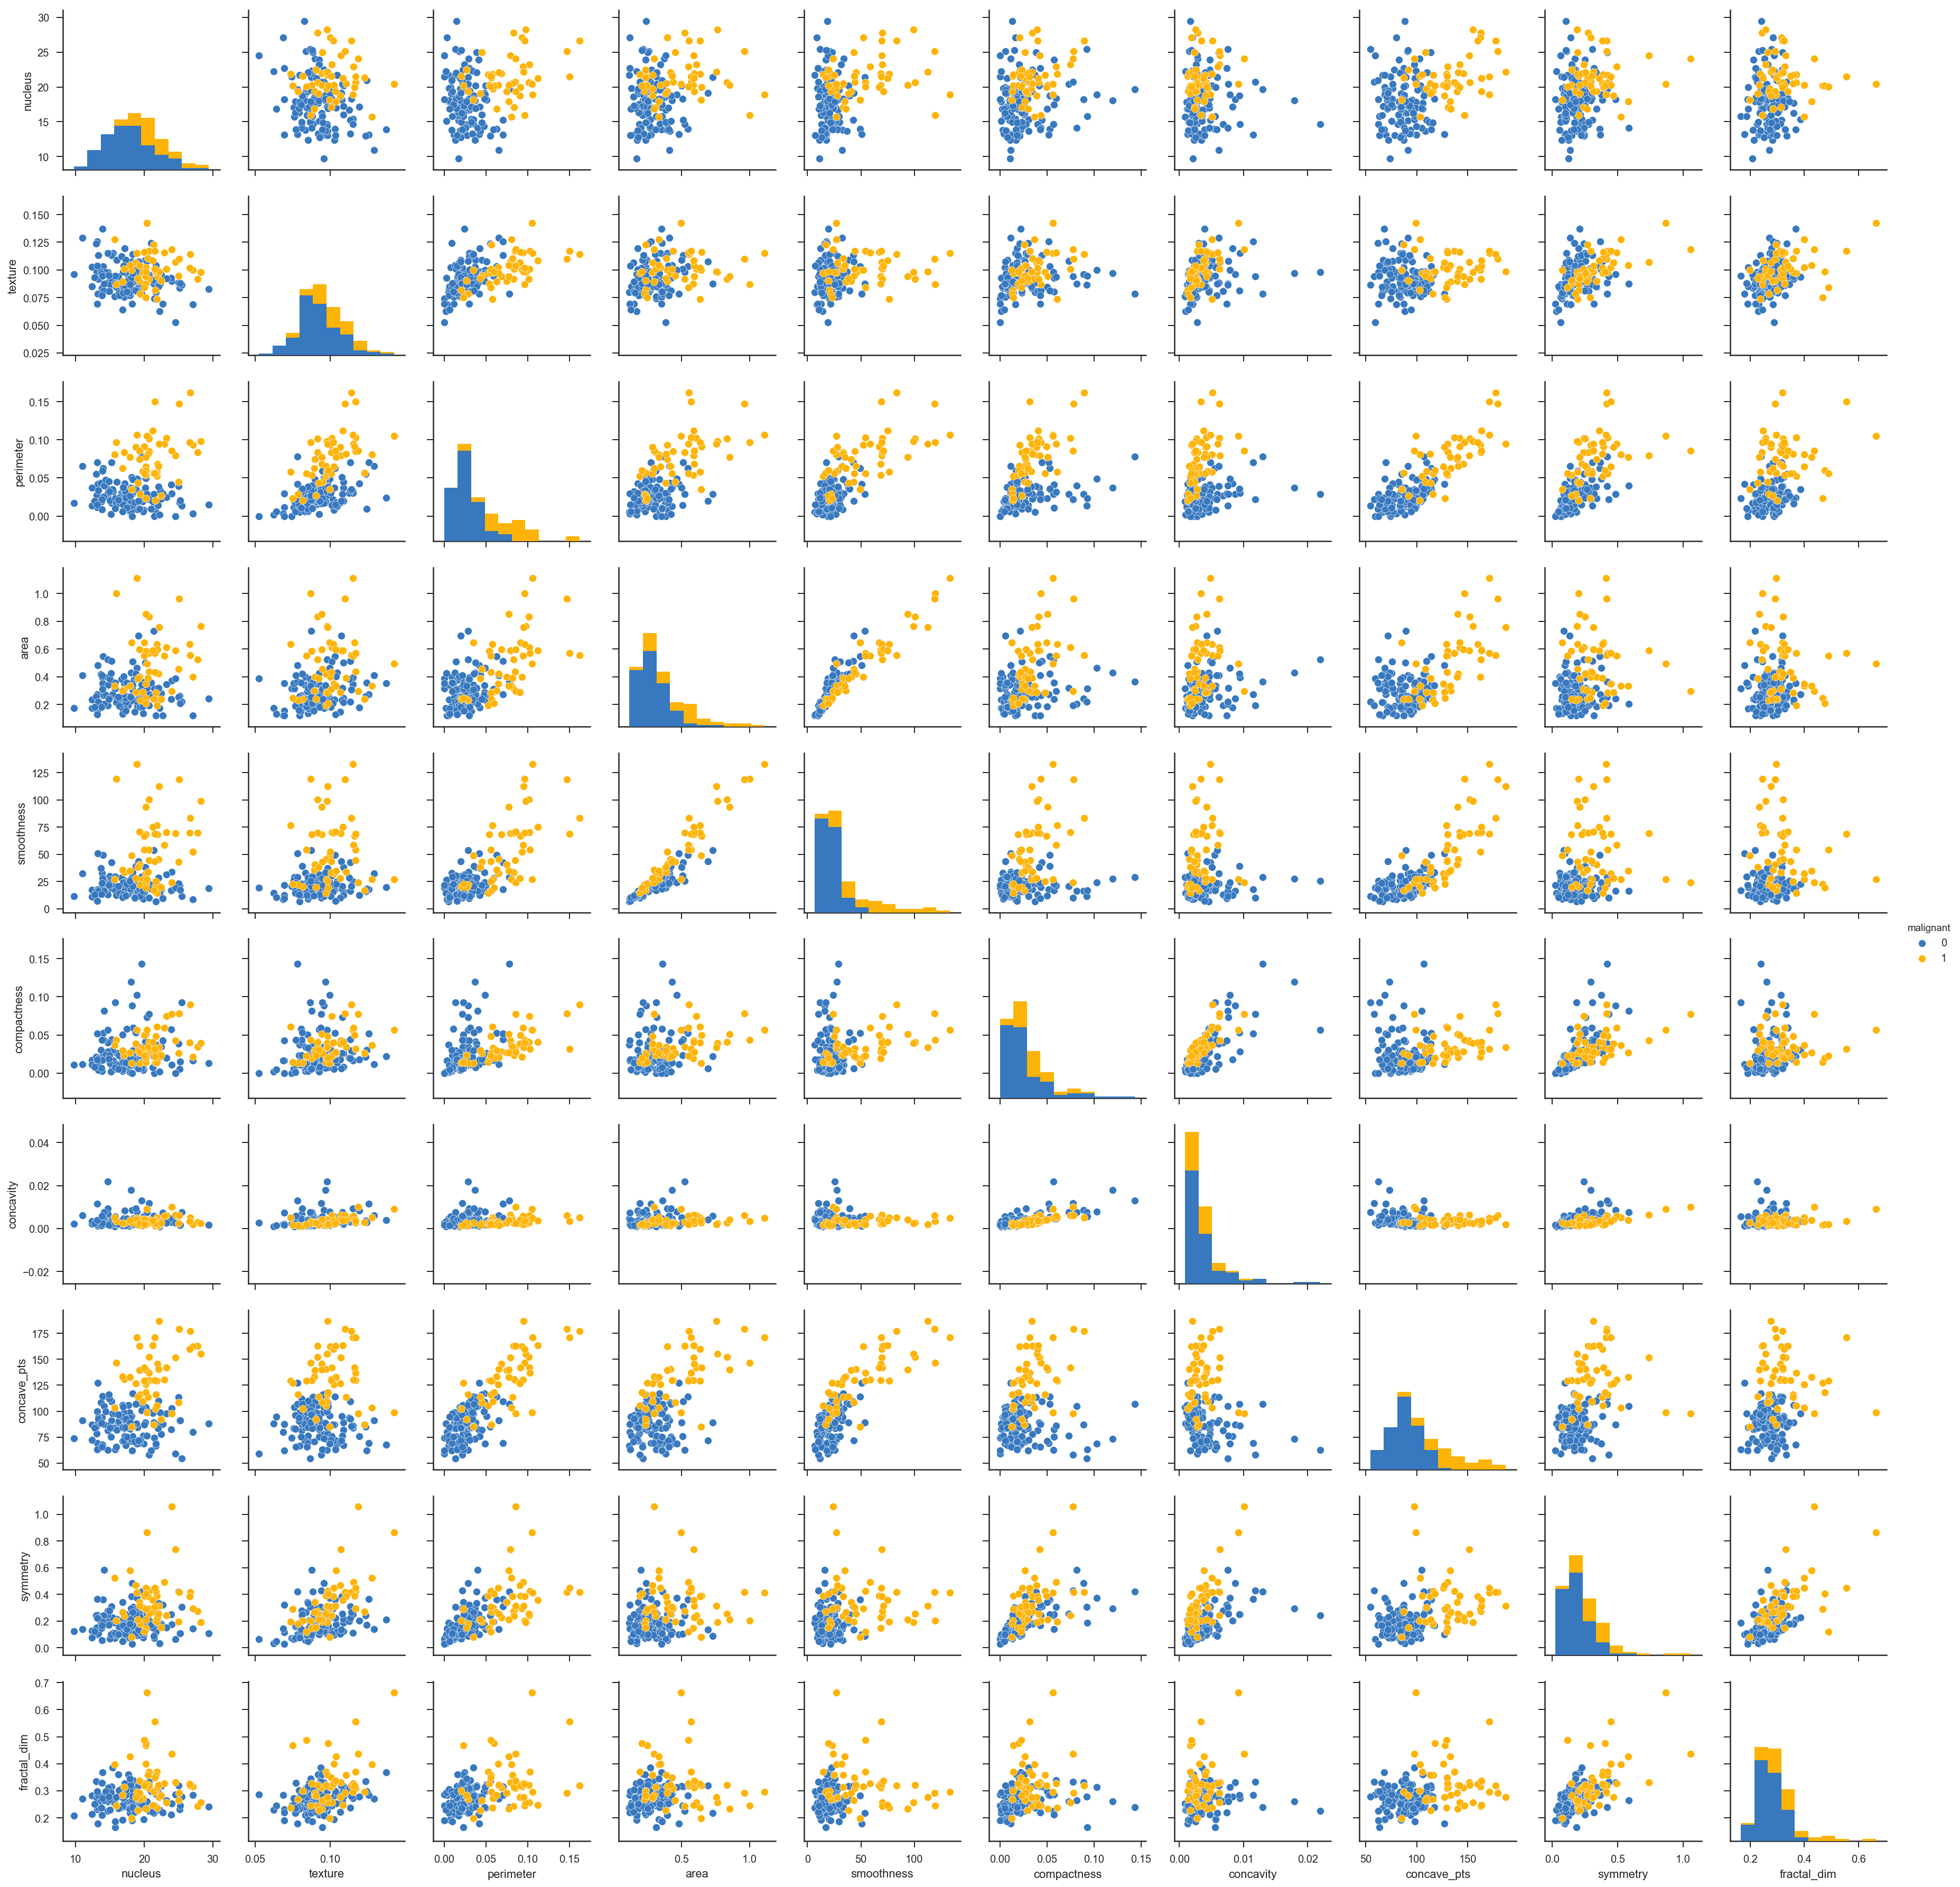

In [21]:
bcw_pairplotter(bcw_se, colvars)

---

### 4.4 Plot the worst value data subset using the pairplotter function

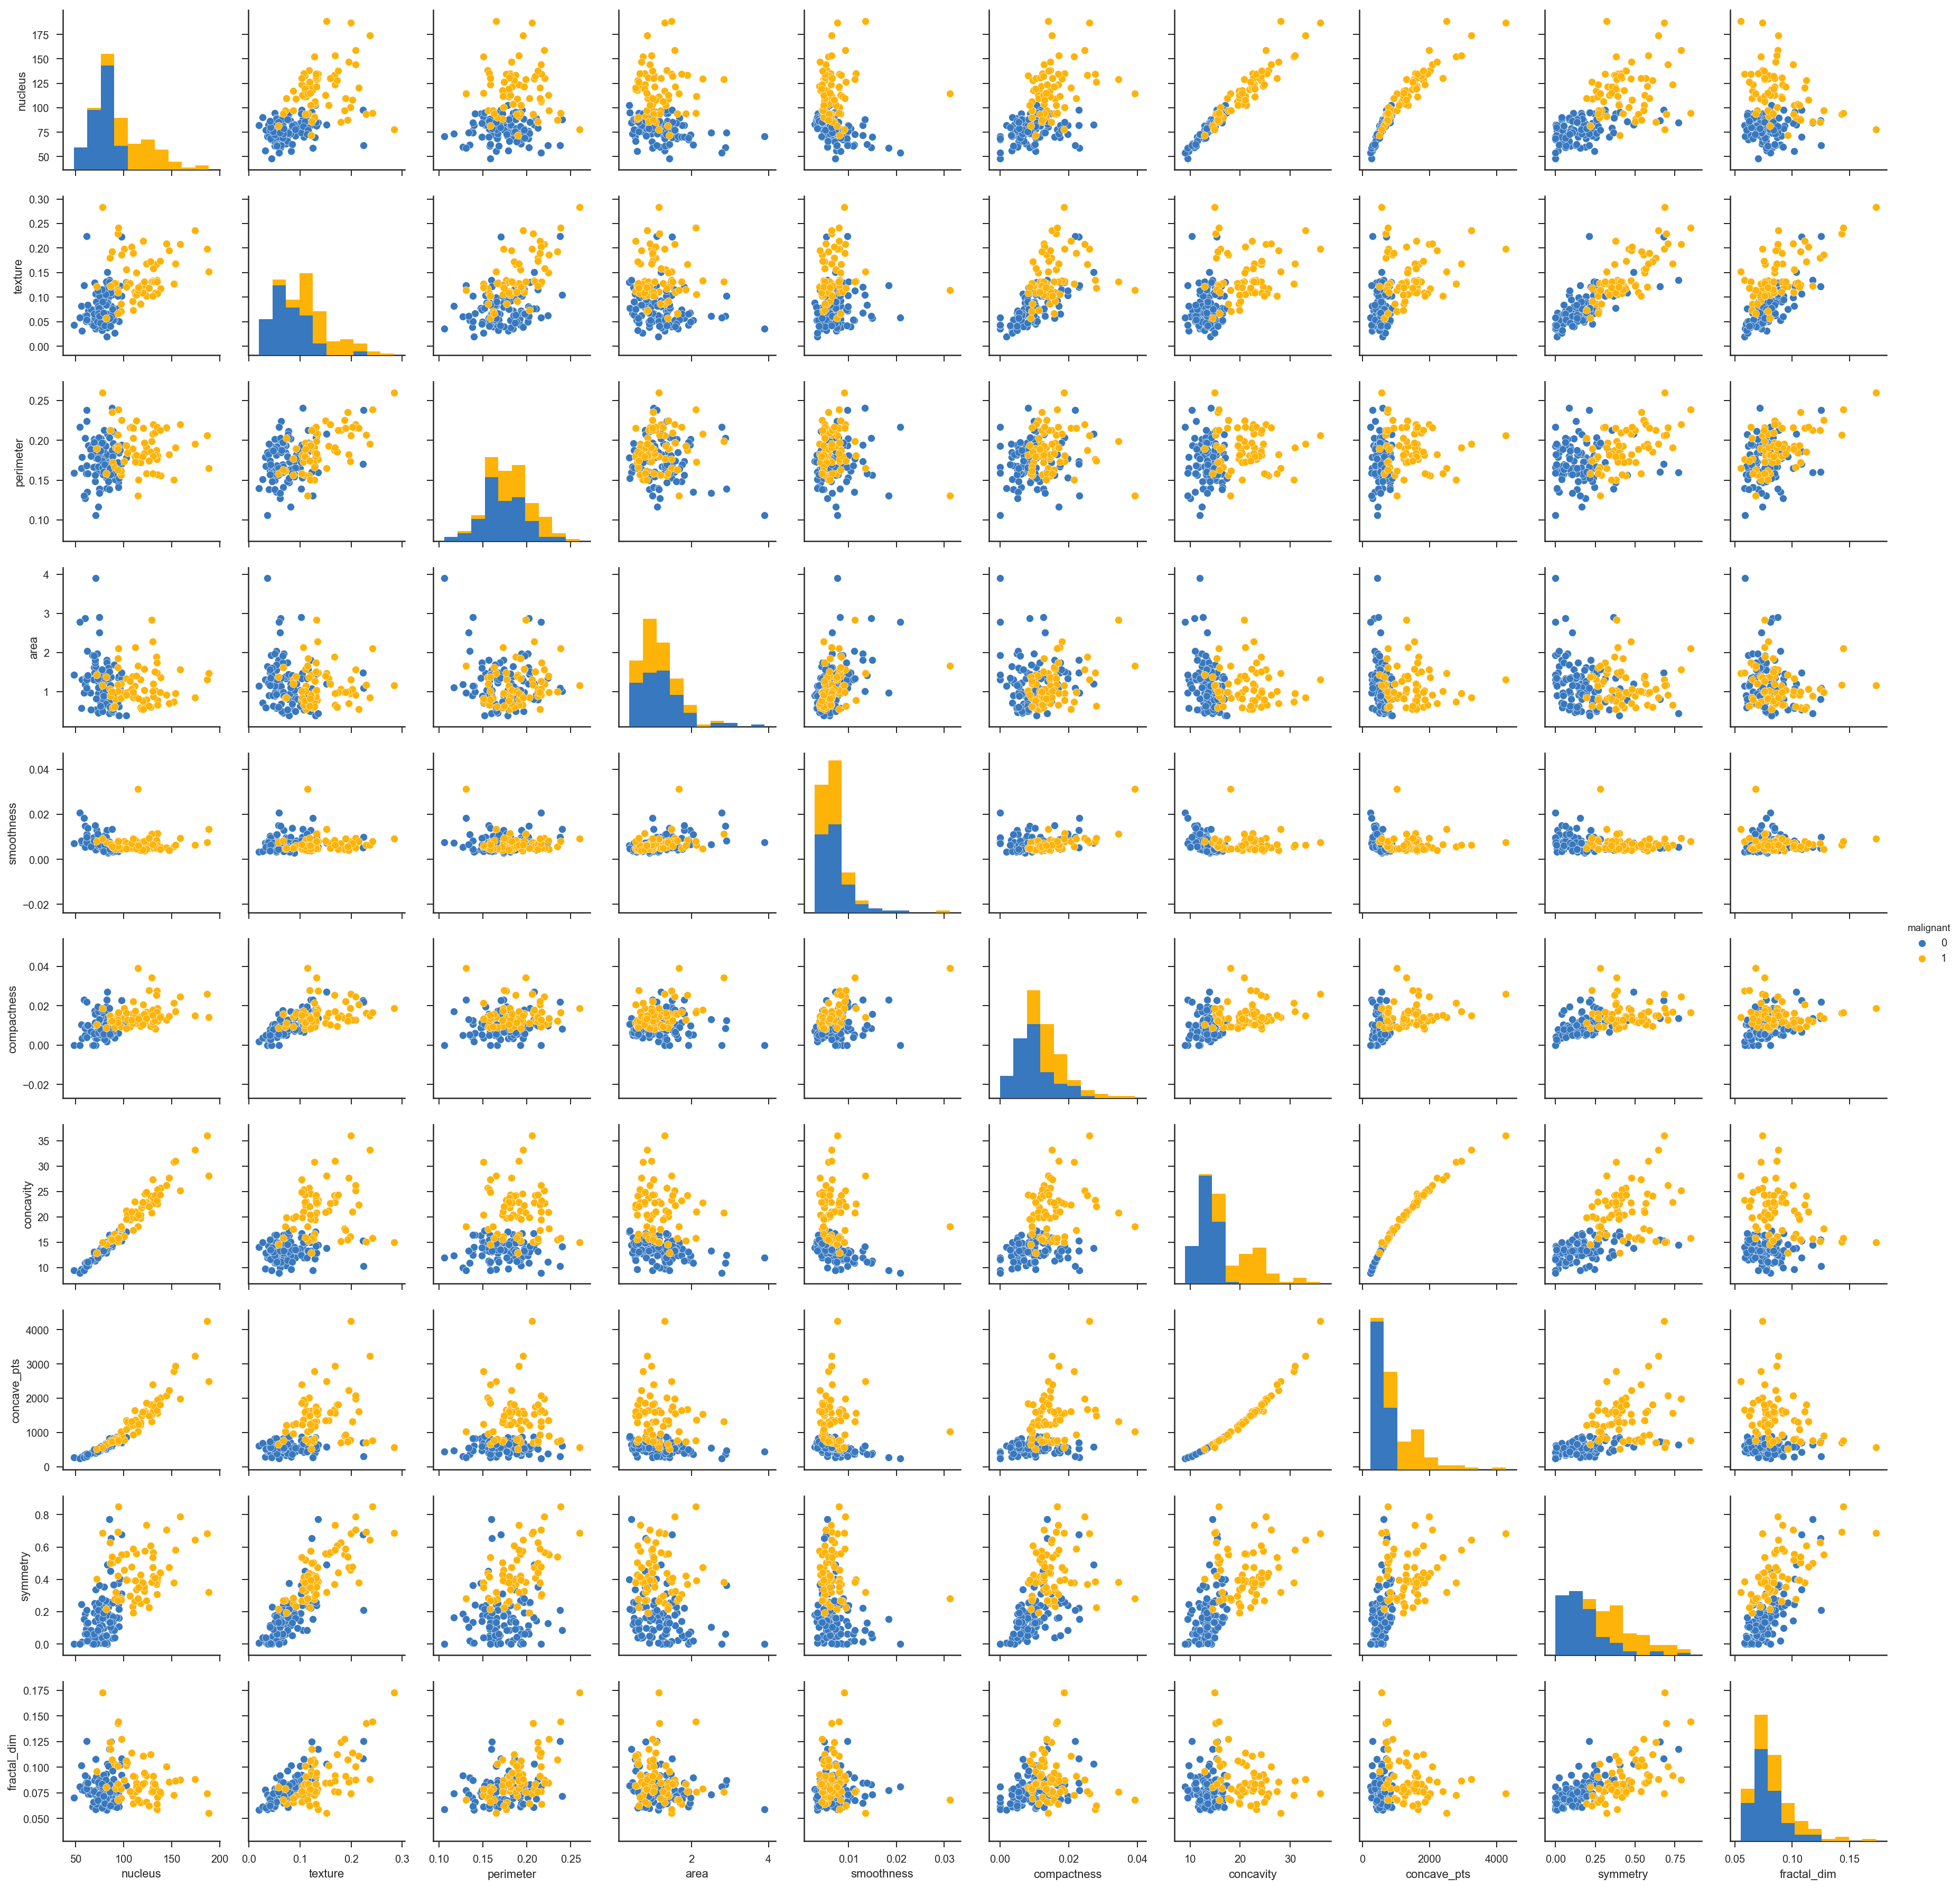

In [22]:
bcw_pairplotter(bcw_worst, colvars)

---

### 5. Test the performance of kNN classifiers on the data using cross-validation

Let's see how the kNN classifier performs on the dataset with cross-validation.

We are going to set some parameters in the classifier constructor. Some clarification below:

1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights** uniform weights indicate that all neighbors have the same weight
3. **metric** and **p**: when distance is minkowski (the default) and p == 2 (the default), _this is equivalent to the euclidean distance metric_

Load scikit's cross-validation module and import `StratifiedKFold`

The `StratifiedKFold()` will return cross-validation _indices_ which you can use to subset your data in a for loop that runs the model and tests it. Get used to using indices for cross-validation on data – it's easy to get soft with `cross_val_score`, but being able do it at a more "manual" level allows for a lot more power and customization. It also reinforces what is happening in your head during cross-validation, since you have to divide up the data yourself with the indices!

The **stratified** version of cross-validation ensures that there are equal proportions the predicted class in each train-test fold. This is going to be a common practice in classification.

In [23]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
from sklearn.cross_validation import StratifiedKFold

/Users/davidyerrington/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Create X, y from the "mean" variables data:**

In [25]:
colvars

['nucleus',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_pts',
 'symmetry',
 'fractal_dim']

In [26]:
y = bcw_mean['malignant'].values
X = bcw_mean[colvars].values


**Create cross-validation train/test indices:**

In [27]:
cv_indices = StratifiedKFold(y, n_folds=5)

In [28]:
# Anyone want to see what these indices look like?
# for train_i, test_i in cv_indices:
#     print test_i

In [29]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, Y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = Y[train_i]
        Y_test = Y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print('Fold accuracy:', acc)
        
    print('Mean CV accuracy:', np.mean(scores))


---

### 5.2: Cross-validate accuracy for a kNN model with 5 neighbors on the mean data subset

In [30]:
mean_knn_n5 = KNeighborsClassifier(n_neighbors=5,
                                   weights='uniform')

accuracy_crossvalidator(X, y, mean_knn_n5, cv_indices)

('Fold accuracy:', 0.86086956521739133)
('Fold accuracy:', 0.86956521739130432)
('Fold accuracy:', 0.89380530973451322)
('Fold accuracy:', 0.94690265486725667)
('Fold accuracy:', 0.90265486725663713)
('Mean CV accuracy:', 0.89475952289342042)


---

### 5.3: Cross-validate accuracy for a kNN model with 1 neighbor on the mean data subset

As you can see the mean cross-validated accuracy is very high with 5 neighbors. 

Let's see what it's like when we use only 1 neighbor:

In [31]:
mean_knn_n2 = KNeighborsClassifier(
    n_neighbors=1,       # The parameter K for number of neighbors
    weights='uniform'    # How votes are calculated per neighborhood for predicted points
)

accuracy_crossvalidator(X, y, mean_knn_n2, cv_indices)

('Fold accuracy:', 0.86086956521739133)
('Fold accuracy:', 0.86086956521739133)
('Fold accuracy:', 0.88495575221238942)
('Fold accuracy:', 0.87610619469026552)
('Fold accuracy:', 0.90265486725663713)
('Mean CV accuracy:', 0.8770911889188151)


---

### 5.4 Cross-validate accuracy for a kNN model with 5 neighbors on the standard error subset

In [32]:
y = bcw_se['malignant'].values
X = bcw_se[colvars].values

se_knn_n2 = KNeighborsClassifier(
    n_neighbors=1,       # The parameter K for number of neighbors
    weights='uniform'    # How votes are calculated per neighborhood for predicted points
)

accuracy_crossvalidator(X, y, se_knn_n2, cv_indices)

('Fold accuracy:', 0.87826086956521743)
('Fold accuracy:', 0.91304347826086951)
('Fold accuracy:', 0.94690265486725667)
('Fold accuracy:', 0.89380530973451322)
('Fold accuracy:', 0.90265486725663713)
('Mean CV accuracy:', 0.90693343593689879)


---

### 5.5 Cross-validate accuracy for a kNN model with 5 neighbors on the worst value subset

In [33]:
y = bcw_worst['malignant'].values
X = bcw_worst[colvars].values

worst_knn_n5 = KNeighborsClassifier(
    n_neighbors=1,       # The parameter K for number of neighbors
    weights='uniform'    # How votes are calculated per neighborhood for predicted points
)

accuracy_crossvalidator(X, y, worst_knn_n5, cv_indices)

('Fold accuracy:', 0.84347826086956523)
('Fold accuracy:', 0.87826086956521743)
('Fold accuracy:', 0.92035398230088494)
('Fold accuracy:', 0.89380530973451322)
('Fold accuracy:', 0.88495575221238942)
('Mean CV accuracy:', 0.88417083493651405)


---

### 6. Plot the kNN prediction boundary

Even with 1 neighbor we do quite well at predicting the malignant observations.

Below you can load an interactive KNN visualization class I wrote and put in your new `utils` directory.

The `KNNBoundaryPlotter` class has 4 required arguments:

    KNNBoundaryPlotter(data, predictor1, predictor2, class_target)
    
It will by default fit a visualization of the decision boundary across 1 to 100 nearest neighbors.

The boundary is where the classifier will vote for malignant vs. benign classes. 


In [34]:
# !pip install widgetsnbextension

In [35]:
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [36]:
bcw_mean.columns

Index([u'malignant', u'nucleus', u'texture', u'perimeter', u'area',
       u'smoothness', u'compactness', u'concavity', u'concave_pts',
       u'symmetry', u'fractal_dim'],
      dtype='object')

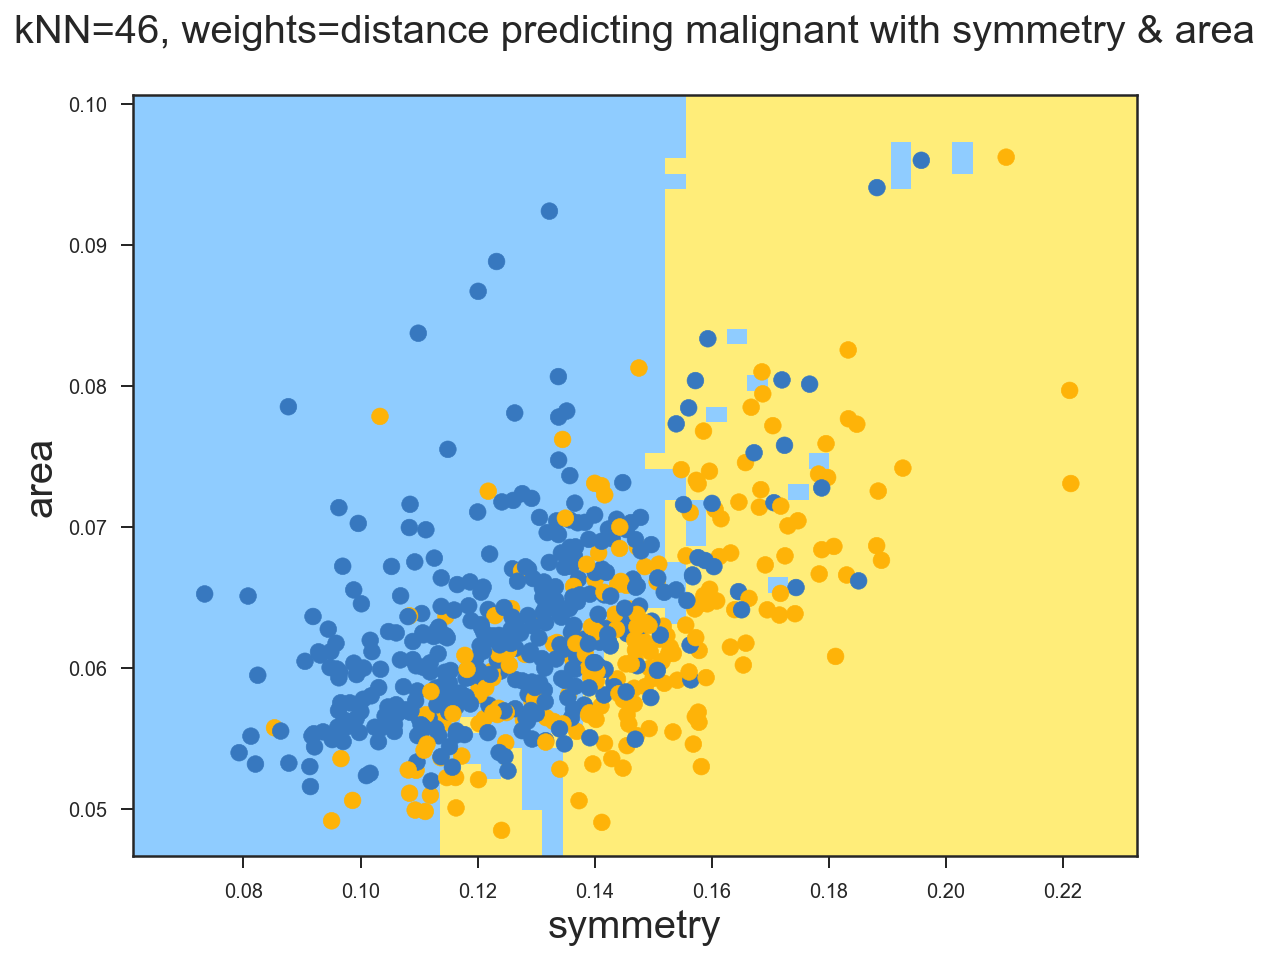

In [37]:
import imp
plotter = imp.load_source('plotter', './knn_plotter.py')
from plotter import KNNBoundaryPlotter

kbp = KNNBoundaryPlotter(bcw_mean, 'symmetry', 'area', 'malignant', nn_range=range(1,101))

kbp.knn_mesh_runner()
kbp.knn_interact()

# Independent Practice

Try some of these yourself.

### 6.2 Try out some other variables of interest to you with the visualization class

---

### 7. What is the effect of increasing/decreasing the neighbors?

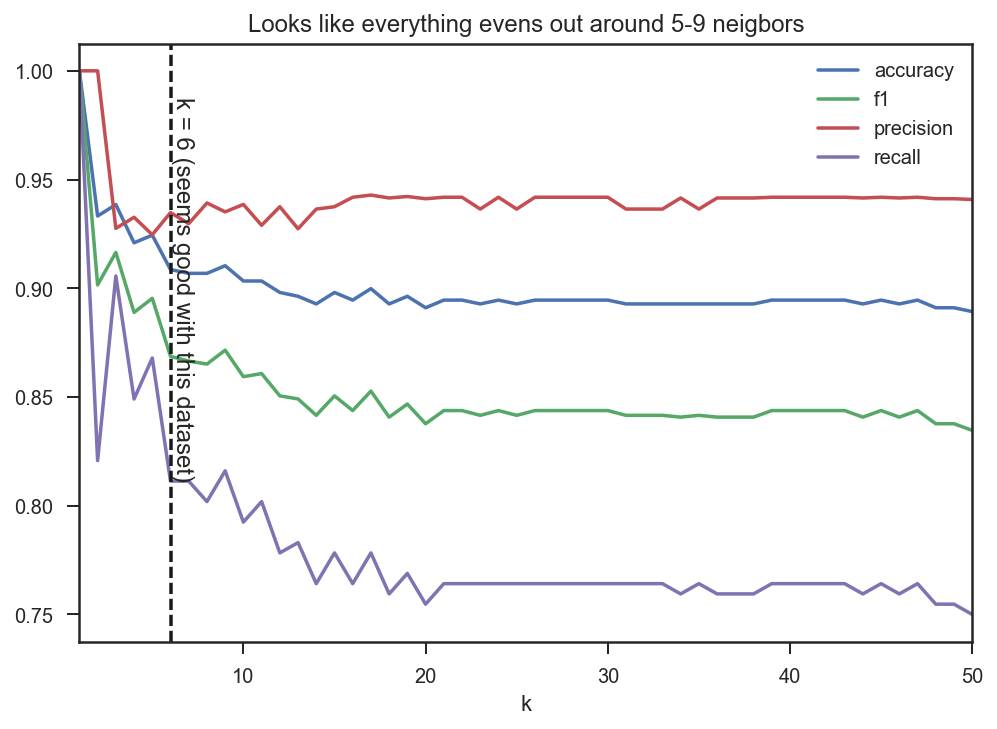

In [61]:
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

## This is still something we need to fix but for the most part you should see that the boundary
## that is drawn for each class by changing the n_neighbors parameter will make it harder to 
## predict areas around the boarders of clusters of points and this will also have an impact on
## misclassifications

## Let's also plot the other metrics alongside accuracy (the default for the .score() function)


scores = []
X = bcw_mean[colvars]

for k in range(1, 51):

    knn        =  KNeighborsClassifier(n_neighbors=k)
    model      =  knn.fit(X, y)
    predicted  =  model.predict(X)
    
    scores.append({
        "k":          k,
        "accuracy":   model.score(X, y),
        "recall":     recall_score(y, predicted),
        "precision":  precision_score(y, predicted),
        "f1":         f1_score(y, predicted)
    })
    
scores = pd.DataFrame(scores)
scores = scores.set_index("k")
scores.plot(title="Looks like everything evens out around 5-9 neigbors")
plt.axvline(6, color='k', linestyle='--')
plt.text(6,.98,'k = 6 (seems good with this dataset)',rotation=-90)

## You should also consider cross validating this as well

---

### 8 What could be wrong with using accuracy as your measure of performance?

In [ ]:
## Remember the baseline accuracy rule.  It doesn't tell you how well you're predicting on the class 
## level so you have to consider precision and recall for each class if it's important or I 
## should say when your baseline accuracy is determined by a class that has a larger dispropotion
## to other classes.  
##
## Think about the case when you have a %75 baseline, but there are 4 classes.  It's very likely
## depending on the model, that you will misclassify the 3 classes that make up the %25 support of the
## entire dataset, and misclassify many of them as the majority class.  Being able to indentify
## this problem and measure it is important information.  Wether not it's a problem is determined
## by your application (think:  Spam vs Cancer -- which is more important to not have false positives / false negatives?)

## See previous plot

---

### 9. Explain changing the number of neighbors in terms of bias-variance tradeoff

Kind of explained this in #7 previous cell but you generally you should see that a fewer number of neighbors will make your model learn to predict on the specific variance of our data (as a result of variance) and the boundaries / edges of classes will look more jagged but too many neighbors will not capture the general characteristics of your data (smoother edges and less distinction between classes -- less variance -- less distinction between classes). 

- Higher k will decrease variance and increase bias.
- Lower k will increase variance and decrease bias

A good way to choose K is to iterate on a few different models score, but also look at precion / recall / F1 in addition to score for each K to see how it  performs on accuracy, but also the other metrics that relate to each class.  Not only is overall accuracy important to understand, but also the rate of misclassfication / performance per each class.

> <img src="https://snag.gy/26k4Qa.jpg" width="500">
> Mainly, you're looking to find that "sweet spot" between bias and variance.  With a K too high or low, you're going to hit one side or the other of this trade-off.

In [ ]:

## This is here in case you want to use this in the future.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')